In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import load_model

from PIL import Image
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [9]:
#Image to ELA image values
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = 'tempresaved.jpg'
    orig = Image.open(filename)
    orig = orig.convert('RGB')
    orig.save(resaved_filename, 'JPEG', quality = quality)
    resaved = Image.open(resaved_filename)
    ela = ImageChops.difference(orig, resaved)
    display(ela)
    print("------------------")
    extrema = ela.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    print(extrema)
    print("------------------")
    print(extrema[0])
    print("------------------")
    print(extrema[1])
    print("------------------")
    print(extrema[0][1])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela = ImageEnhance.Brightness(ela).enhance(scale)
    return ela

In [15]:
display(Image.open("/kaggle/input/ela-tester-img/Tampered.jpeg"))
display(Image.open("/kaggle/input/ela-tester-img/Untampered.jpeg"))

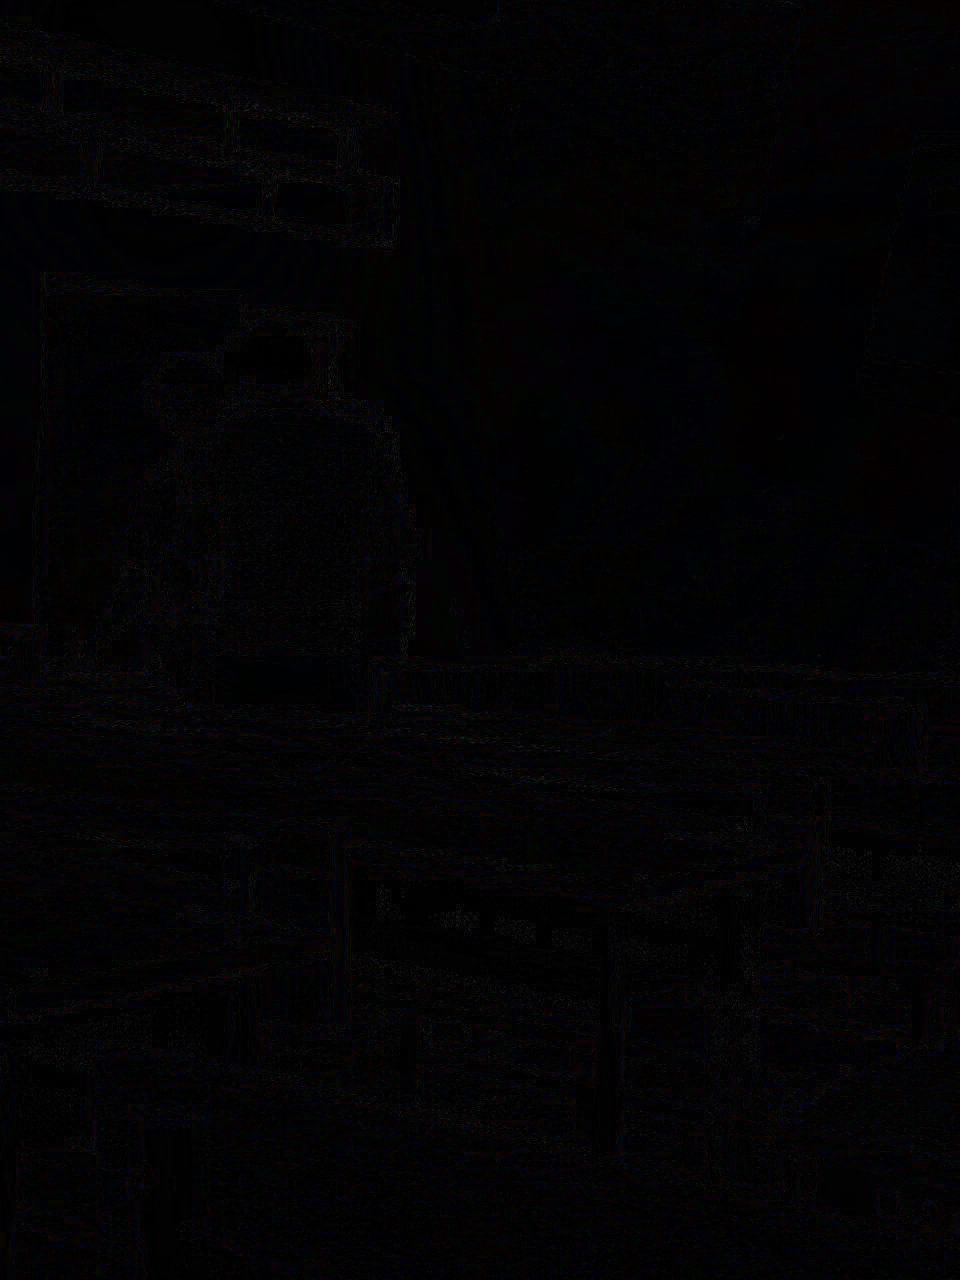

------------------
((0, 49), (0, 40), (0, 51))
------------------
(0, 49)
------------------
(0, 40)
------------------
49


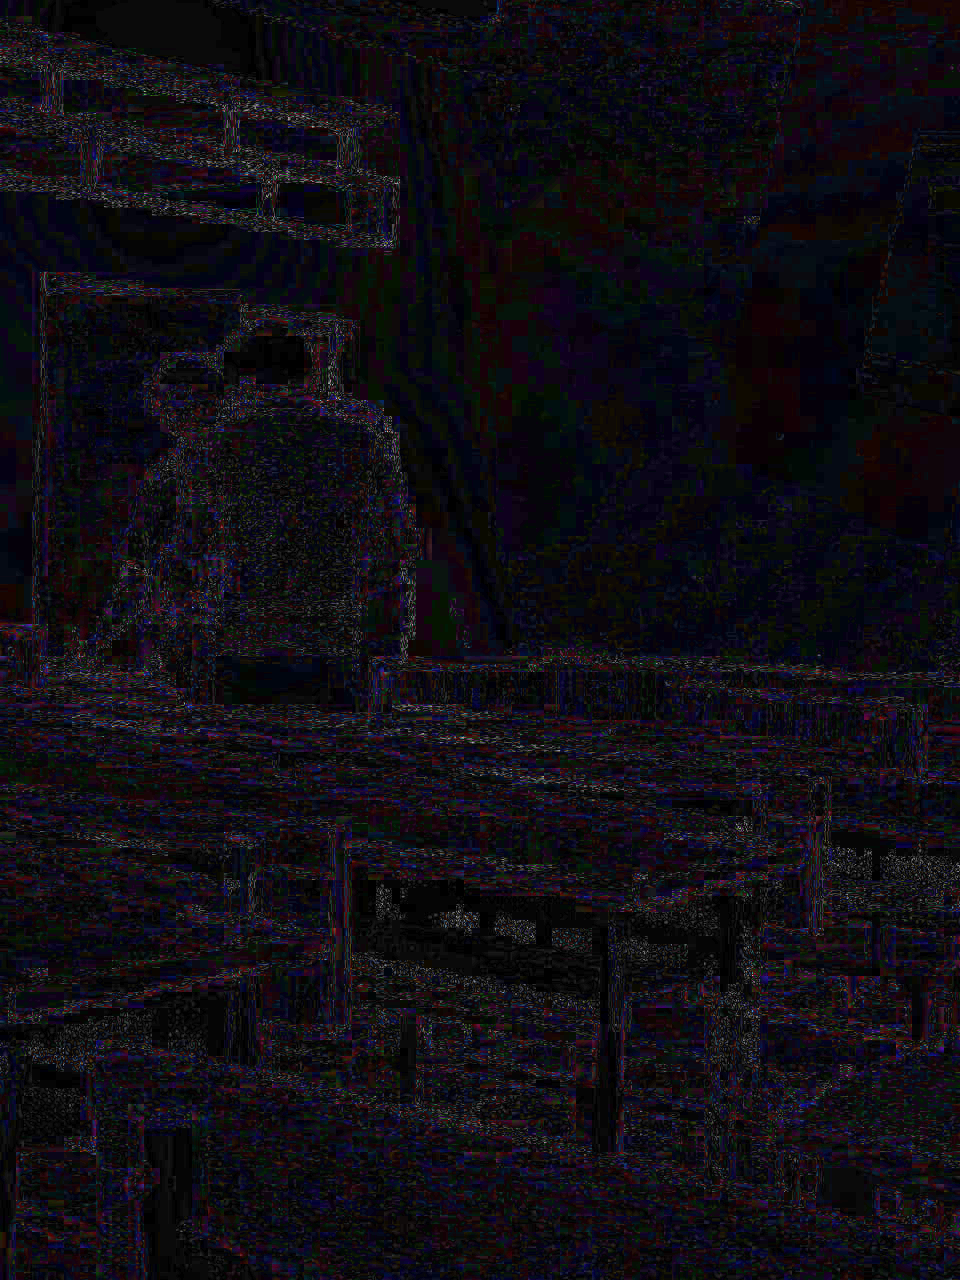

In [14]:
convert_to_ela_image("/kaggle/input/ela-tester-img/Tampered.jpeg",20)

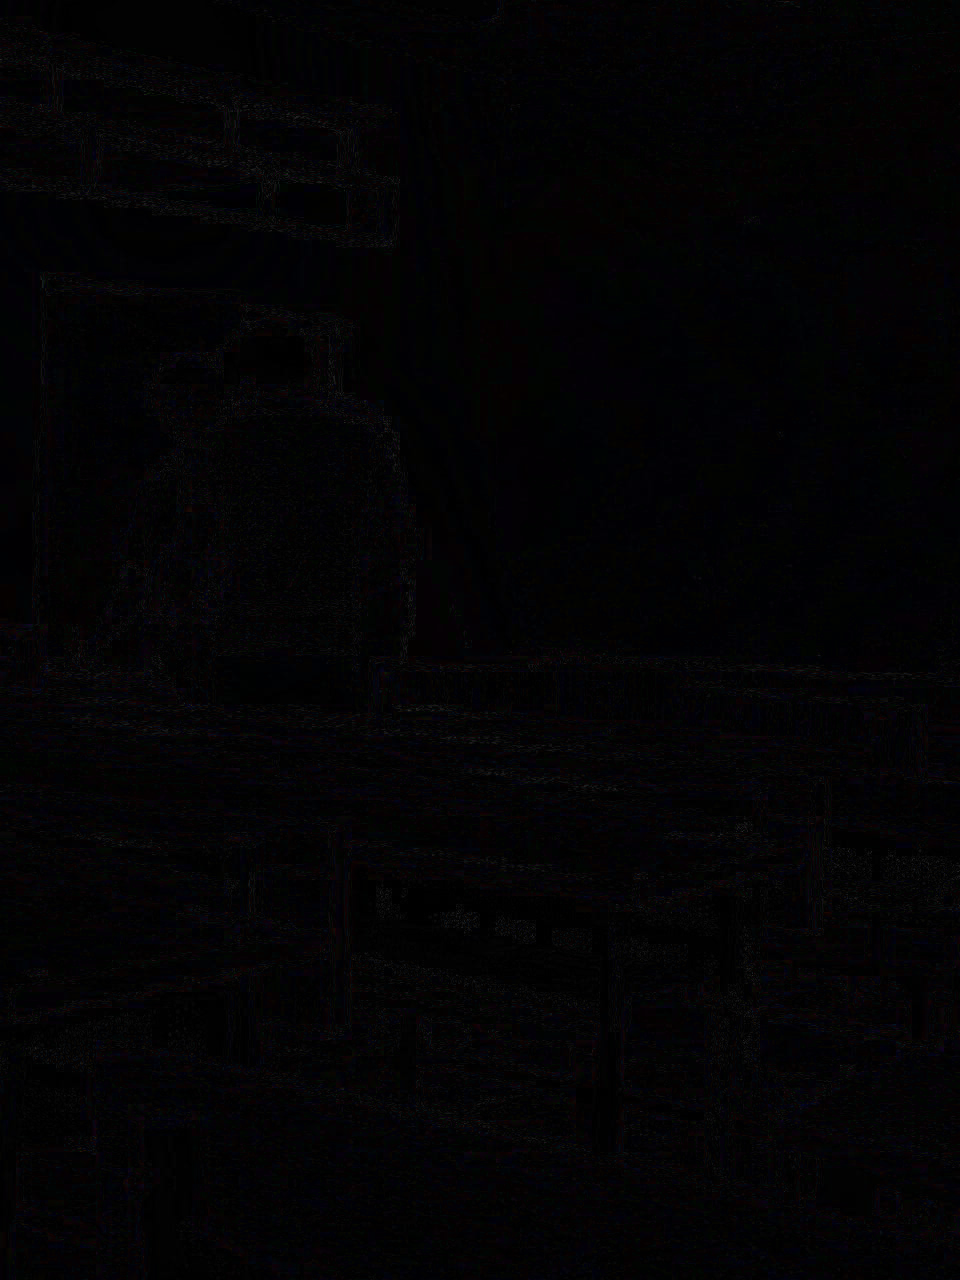

------------------
((0, 53), (0, 50), (0, 47))
------------------
(0, 53)
------------------
(0, 50)
------------------
53


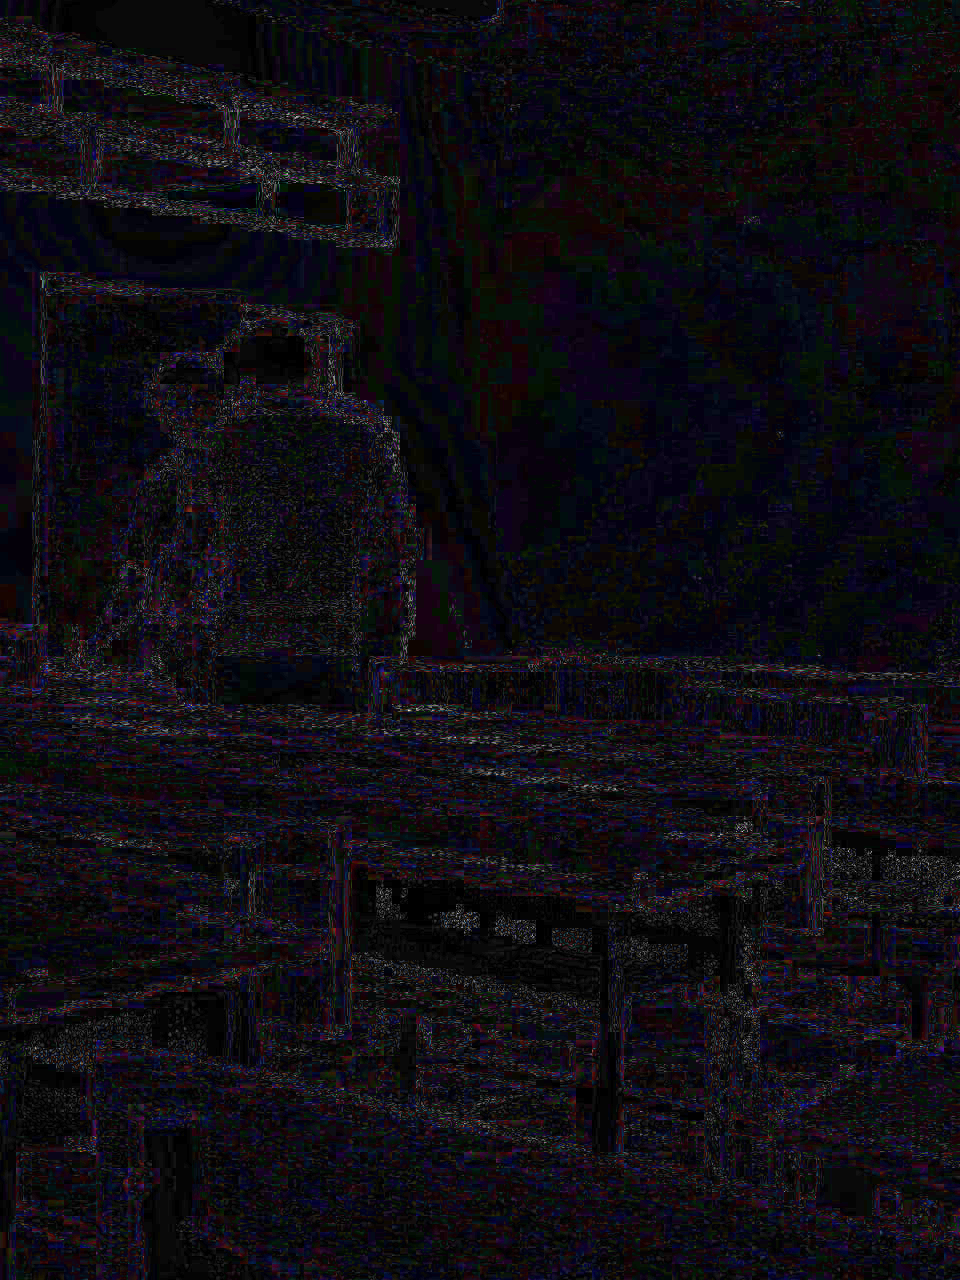

In [13]:
convert_to_ela_image("/kaggle/input/ela-tester-img/Untampered.jpeg",20)

In [17]:
classifier_model = load_model("/kaggle/input/trained-hybrid-network/alex_inception_leaky.h5")

2022-05-19 17:05:56.187377: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
classifier_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_158 (Conv2D)             (None, 60, 60, 16)   64          input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 60, 60, 32)   128         input_17[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_126 (MaxPooling2D (None, 29, 29, 16)   0           conv2d_158[0][0]                 
___________________________________________________________________________________________

In [29]:
test_case = []
test_case.append(np.array(convert_to_ela_image("/kaggle/input/ela-tester-img/Tampered.jpeg",80).resize((60, 60),resample=Image.LANCZOS)).flatten() / 255.0)
test_case = np.array(test_case)
test_case = test_case.reshape(-1, 60, 60, 3)
result=classifier_model.predict([test_case])
np.argmax(result,axis = 1)

------------------
((0, 9), (0, 7), (0, 9))
------------------
(0, 9)
------------------
(0, 7)
------------------
9


array([1])